In [11]:
from collections import defaultdict
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import nltk
from nltk.tokenize import regexp_tokenize, word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords, wordnet
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
import string
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv('data/smaller/yelp_review.csv')
df.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,0,0,0
1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...,0,0,0
2,MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,5,2016-05-28,Lester's is located in a beautiful neighborhoo...,0,0,0
3,IXvOzsEMYtiJI0CARmj77Q,bv2nCi5Qv5vroFiqKGopiw,ACFtxLv8pGrrxMm6EgjreA,4,2016-05-28,Love coming here. Yes the place always needs t...,0,0,0
4,L_9BTb55X0GDtThi6GlZ6w,bv2nCi5Qv5vroFiqKGopiw,s2I_Ni76bjJNK9yG60iD-Q,4,2016-05-28,Had their chocolate almond croissant and it wa...,0,0,0


In [13]:
df.shape

(5261668, 9)

In [14]:
eda = df

In [15]:
731363 + 438161

1169524

## Ratings Distribution

In [16]:
df['stars'].value_counts()

5    2253347
4    1223316
1     731363
3     615481
2     438161
Name: stars, dtype: int64

Text(0.5, 1.0, 'Ratings Distribution')

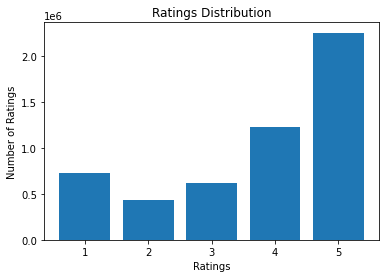

In [17]:
fig, ax = plt.subplots()

ax.bar(df['stars'].value_counts().keys(), df['stars'].value_counts().values)
ax.set_xlabel('Ratings')
ax.set_ylabel('Number of Ratings')
ax.set_title('Ratings Distribution')

# Manual Neutral Review Classification

In [18]:
pd.set_option("display.max_colwidth", None)

In [19]:
neutrals = df[df['stars'] == 3]

In [20]:
neutrals.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
8,w41ZS9shepfO3uEyhXEWuQ,u0LXt3Uea_GidxRW1xcsfg,5r6-G9C4YLbC7Ziz57l3rQ,3,2013-02-09,"Not bad!! Love that there is a gluten-free, vegan version of the cheese curds and gravy!!\n\nHaven't done the poutine taste test yet with smoke's but Im excited to see which is better. However poutini's might win as they are vegan and gluten-free",1,0,0
11,PdZ_uFjbbkjtm3SCY_KrZw,u0LXt3Uea_GidxRW1xcsfg,XWTPNfskXoUL-Lf32wSk0Q,3,2011-09-28,"Server was a little rude.\n\nOrdered the calamari, duck confit poutine and the trout fish with miso soba - all very tasty. Definitely not your typical diner.",5,0,1
13,lsoSqIrrDbQvWpMvsSj2xw,u0LXt3Uea_GidxRW1xcsfg,RtUvSWO_UZ8V3Wpj0n077w,3,2012-12-03,"Wanted to check out this place due to all the hype I had heard. My friend wanted to come here for her birthday. We had a group of seven and based on the way the seating works (as it is communal), we wind up sharing with another group of five. \n\nFood was ok - not sure what the hype was. Almost 75% of the dishes had some sort of cheese in it.\n\nThis place is very loud so not ideal for catching up\/talking. Not a great place to go if you have any gluten or vegan restrictions.\n\nInteresting concept. Would definitely recommend to try this place once - but definitely not worth the 30- 45 mins wait.",2,1,1
17,xdu8nXrbNKeaywCX79KZSw,u0LXt3Uea_GidxRW1xcsfg,PFPUMF38-lraKzLcTiz5gQ,3,2010-09-15,Came here with my girlfriends one Sunday afternoon. This place will take a long time to serve your food - as it took them almost an hour to give us our food. So make sure you give yourself lots of time! It is definitely a lazy brunch place!\n\nDefinitely recommend the pancakes! Beware of the portion sizes - they are huge!,2,0,0
18,K7o5jDInfmX3cY5oH6ATNw,u0LXt3Uea_GidxRW1xcsfg,oWTn2IzrprsRkPfULtjZtQ,3,2012-09-23,"Came here for a burger as one of my friends said they had good burgers and people from work would come by twice a month for a burger run.\n\nOrdered the original was was ok, wasn't as amazing as everyone says it to be. I think the veggie option would have been better.\n\nA little pricy for a take-out burger.",4,0,0


In [21]:
neutrals.loc[:, ['target']] = 0

C:\Users\nehcr\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:659: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[k] = np.nan
C:\Users\nehcr\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [22]:
# review at index 8 is 'positive'
neutrals.loc[8, ['target']] = 1

In [23]:
# review at index 11 is positive
neutrals.loc[11, ['target']] = 1

In [24]:
neutrals.loc[24, ['target']] = 1

In [25]:
neutrals.loc[30:70]

,review_id,user_id,business_id,stars,date,text,useful,funny,cool,target
50,66KqTwiQ1oB9-aTsoEN35Q,u0LXt3Uea_GidxRW1xcsfg,DKiRDPtQ5cTN-eX1oEgA9w,3,2017-01-04,"It's a pub... nice and clean one.\n\nCame here to grab some food with the girls since the Thai place below was an hour wait. We stuck with the normal pub food: burgers, fries and grilled cheese sandwich.\n\nThe burger presentation was great - it comes with fries and some onion rings piled on top. It was a decent burger.\n\nGirlfriend got the grilled cheese sandwich with bacon - which she said was good.\n\nWhen looking at the menu - there are so many options to choose from... especially with the pictures they include. The only thing is the pictures always look better then the real thing. The Sheppard's pie looked so yummy but when we saw another table get it, it didn't look so appealing.",0,0,0,0
54,cafDR6sZnIO02tf03ZXRZw,u0LXt3Uea_GidxRW1xcsfg,FQr_scgz9a4sXTdRS4d3mg,3,2015-06-15,"Nice place by Cumberland place. After we had sat down, we were given two HUGE blown up pitas. So we had ordered the eggplant dip to go with it. It had a nice smoked flavour to it but not even garlic taste for my liking so it was just a-ok.\n\nOrdered a chicken shawarma and a mango strawberry juice. The juice was yummy and would definitely order it again! The shawarma - I'm not sure about it. The meat wasn't as tasty as I thought it would be. Maybe I need to try the falafel instead next time.",0,0,1,0
62,UmJM6J7KJT0KhGvOZ4n3IQ,u0LXt3Uea_GidxRW1xcsfg,xpJEBXTCQh5Ib8BJrjt9Bg,3,2016-02-08,"Came here after dinner to meet up with some friends...it was nice and roomy for 7 people. \n\nWe ordered a plate of Rosemary fries to share, which wasn't bad, however when served it was room temperature and did not taste like it just came out of the fryer.\n\nBF had ordered a couple of beers, which he was not impressed at all with.",0,0,0,0
63,-Km-gkgaAJAx37yEHIERDg,u0LXt3Uea_GidxRW1xcsfg,yuFdJdrnfMp3cfXVwTXjjA,3,2016-02-08,"Wanted to give this place a try since it was in my neighbourhood and I wouldn't have to go far. Came here for a late lunch on a Friday - there was a few tables, but nothing crazy.\n\nWe had ordered:\n\n- Spicy Miso Ramen\n- Salt Broth Ramen\n\nThey were ok - can't say there were great and can't say it was terrible. The noodles had a nice texture to it, a bit chewy and not too soft. But the broth was a bit bland - definitely lacking some depth to it like another reviewer had said.\n\nLooking at the menu, they definitely did have quite a few ramen options - perhaps too many options and they should try to narrow it down to make them better.\n\nPerhaps next time we should try the other menu items and not the ramen.",0,0,0,0
68,Y8vA-J6yGkr5-nE95tbjGA,u0LXt3Uea_GidxRW1xcsfg,1jNteKQ2JuF6Sk1SI9X23Q,3,2012-09-23,"Chinese version of Cheesecake factory. \n\nCame here with a friend on a Thursday night at 7:30pm and was told it was a 45 mins wait. My friend had walked by at 6pm to try to make a reservation in person but they said they wouldn't take it.\n\nWe wind up sitting at the bar to bypass the wait, as they serve the full menu at the bar as well.\n\nNothing crazy different on the menu but the bartenders were really nice as we had sat there for over 2 hours.\n\nWe had ordered the crispy green beans which was really tasty. Ma Pao Tofu which was weird that it was crispy tofu served on top of a bed of broccoli. Vegetarian fried rice, ok but also served with a lot of broccoli.\n\nWill be back to try some of their noodle dishes.",0,0,0,0
69,S5BSUs-iDrwn6o5968LmEg,u0LXt3Uea_GidxRW1xcsfg,xNNAfZJkLZlAeS-I7-QwgA,3,2017-10-16,"We were here on a holiday Monday where nothing much was open. We had to grab some takeout as we were in a rush and this was the only place open.\n\nWe ordered:\n- beef noodle soup\n- grilled pork chop rice\n- grilled port vermicelli \n\nThe food was ok, nothing exciting and kind of bland.",0,0,0,0
70,JCna3sfrjqtnsG7l-pSs-A,u0LXt3Uea_GidxRW1xcsfg,uATqc1QJkS5lOKfoJ6Uz2w,3,2013-02-18,"Read abou

In [26]:
neutrals.loc[54, ['target']] = 1

C:\Users\nehcr\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [27]:
neutrals.loc[68, ['target']] = 1

In [28]:
neutrals.loc[70, ['target']] = 1

In [29]:
neutrals.loc[76, ['target']] = 1

In [30]:
neutrals.loc[78, ['target']] = 1

In [31]:
neutrals.loc[112, ['target']] = 1

In [32]:
neutrals.loc[130, ['target']] = 1

In [33]:
neutrals.loc[135, ['target']] = 1

In [34]:
neutrals.loc[140, ['target']] = 1

In [35]:
neutrals.loc[151, 'target'] = 1

In [36]:
neutrals.loc[160, 'target'] = 1

In [37]:
neutrals.loc[181, 'target'] = 1

In [38]:
neutrals.loc[201, 'target'] = 1

In [39]:
neutrals.loc[203, 'target'] = 1

In [40]:
neutrals.loc[205, 'target'] = 1

In [41]:
neutrals.loc[227, 'target'] = 1

In [42]:
neutrals.loc[255, 'target'] = 1

In [43]:
neutrals.loc[256, 'target'] = 1

In [44]:
neutrals.loc[269, 'target'] = 1

In [45]:
neutrals.loc[284, 'target'] = 1

In [46]:
neutrals.loc[290, 'target'] = 1

In [47]:
neutrals.loc[295, 'target'] = 1

In [48]:
neutrals.loc[296, 'target'] = 1

In [49]:
neutrals.loc[316, 'target'] = 1

In [50]:
neutrals.loc[320, 'target'] = 1

In [51]:
neutrals.loc[322, 'target'] = 1

In [52]:
neutrals.loc[329, 'target'] = 1

In [53]:
neutrals.loc[340, 'target'] = 1

In [54]:
neutrals.loc[347, 'target'] = 1

In [55]:
neutrals.loc[352, 'target'] = 1

In [56]:
neutrals.loc[353, 'target'] = 1

In [57]:
neutrals.loc[374, 'target'] = 1

In [58]:
neutrals.loc[375, 'target'] = 1

In [59]:
neutrals.loc[385, 'target'] = 1

In [60]:
neutrals.loc[389, 'target'] = 1

In [61]:
neutrals.loc[398, 'target'] = 1

In [62]:
neutrals.loc[412, 'target'] = 1

In [63]:
neutrals.loc[418, 'target'] = 1

In [64]:
neutrals.loc[434, 'target'] = 1

In [65]:
neutrals.loc[440, 'target'] = 1

In [66]:
neutrals.loc[464, 'target'] = 1

In [67]:
neutrals.loc[467, 'target'] = 1

In [68]:
neutrals.loc[469, 'target'] = 1

In [69]:
neutrals.loc[477, 'target'] = 1

In [70]:
neutrals.loc[479, 'target'] = 1

In [71]:
neutrals.loc[482, 'target'] = 1

In [72]:
neutrals.loc[486, 'target'] = 1

In [73]:
neutrals.loc[490, 'target'] = 1

In [74]:
neutrals.loc[491, 'target'] = 1

In [75]:
neutrals.loc[495, 'target'] = 1

In [76]:
neutrals.loc[497, 'target'] = 1

In [77]:
neutrals.loc[500, 'target'] = 1

In [78]:
neutrals.loc[523, 'target'] = 1

In [79]:
neutrals.loc[525, 'target'] = 1

In [80]:
neutrals.loc[528, 'target'] = 1

In [81]:
neutrals.loc[532, 'target'] = 1

In [82]:
neutrals.loc[537, 'target'] = 1

In [83]:
neutrals.loc[542, 'target'] = 1

In [84]:
neutrals.loc[543, 'target'] = 1

In [85]:
neutrals.loc[553, 'target'] = 1

In [86]:
neutrals.loc[555, 'target'] = 1

In [87]:
neutrals.loc[561, 'target'] = 1

In [88]:
neutrals.loc[568, 'target'] = 1

In [89]:
neutrals.loc[570, 'target'] = 1

In [90]:
neutrals.loc[580, 'target'] = 1

In [91]:
neutrals.loc[587, 'target'] = 1

In [92]:
neutrals.loc[588, 'target'] = 1

In [93]:
neutrals.loc[591, 'target'] = 1

In [94]:
neutrals.loc[592, 'target'] = 1

In [95]:
neutrals.loc[604, 'target'] = 1

In [96]:
neutrals.loc[606, 'target'] = 1

In [97]:
neutrals.loc[613, 'target'] = 1

In [98]:
neutrals.loc[618, 'target'] = 1

In [99]:
neutrals.loc[666, 'target'] = 1

In [100]:
neutrals.loc[719, 'target'] = 1

In [101]:
neutrals.loc[723, 'target'] = 1

In [102]:
neutrals.loc[724, 'target'] = 1

In [103]:
neutrals.loc[732, 'target'] = 1

In [104]:
neutrals.loc[751, 'target'] = 1

In [105]:
neutrals.loc[763, 'target'] = 1

In [106]:
neutrals.loc[765, 'target'] = 1

In [107]:
neutrals.loc[766, 'target'] = 1

In [108]:
neutrals.loc[775, 'target'] = 1

In [109]:
neutrals.loc[779, 'target'] = 1

In [110]:
neutrals.loc[785, 'target'] = 1

In [111]:
neutrals.loc[793, 'target'] = 1

In [114]:
neutrals.loc[807, 'target'] = 1

C:\Users\nehcr\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [115]:
neutrals.loc[811, 'target'] = 1

In [116]:
neutrals.loc[813, 'target'] = 1

In [117]:
neutrals.loc[814, 'target'] = 1

In [118]:
neutrals.loc[815, 'target'] = 1

In [119]:
neutrals.loc[821, 'target'] = 1

In [120]:
neutrals.loc[829, 'target'] = 1

In [121]:
neutrals.loc[832, 'target'] = 1

In [122]:
neutrals.loc[833, 'target'] = 1

In [123]:
neutrals.loc[841, 'target'] = 1

In [124]:
neutrals.loc[845, 'target'] = 1

In [125]:
neutrals.loc[850, 'target'] = 1

In [112]:
neutrals.loc[800:850]

,review_id,user_id,business_id,stars,date,text,useful,funny,cool,target
807,IZvA2Sous1e3wYcV4IMHlQ,5V8eXkTJb6IejJkMDaj_Bw,UP2iSqCGIHU5EHZ1vNNfkQ,3,2011-05-02,"How incredibly adorable!! Practical Art is just what the name implies - tons of items that are beautiful works of art that have the bonus of being able to be used in your everyday life - cooking dinner, having a glass of wine, relaxing in the living room, sending greetings to friends and so much more.\n\nMost of the items are for the home and sadly aren't the style of mine, which makes it hard to buy for myself here. However, I have a feeling this will be a potential gift spot for friends for years to come. And I just realized, people may now try to vie for my friendship or get engaged just knowing of potential gifts they will receive. \n\nThe employee that was there was really nice as I aimlessly walked about, but after seeing the special offer on yelp of iced tea or tequila, I'm suddenly sad I wasn't offered any.",1,1,1,0
809,sOmSkrLFhji-0x8P16CJdQ,5V8eXkTJb6IejJkMDaj_Bw,NmbBDuALeotUv01k7Qqr7g,3,2010-05-03,"I'm a pretty big fan of Urban Outfitters, mostly because you never expect to find just about anything in there, but you always can, as long as you are willing to pay for it. I've found household items, cute chandeliers, and usually always get key covers there.. this past time it was unikeys :)\n\nI sometimes cry a bit that the clothing is a little more mainstream than the other items, but I typically find a few basic pieces I should grab. \n\nOne awesome upside is the bags are durable and the straps long enough you can put the bag over your shoulder like a tote.. and the inside is bright pink.\n\nDownfall is shoes are way too expensive there... I hate paying so much for things that just walk on the ground. Gross.\n\nNot enough good deals or original clothing to go back frequently but I do love to window shop there and occasionally come out with a gem.",0,0,0,0
811,601My-4M4FR13FHwD0jnqg,5V8eXkTJb6IejJkMDaj_Bw,bKxKPGmkwH-Q-GSbt7chNA,3,2010-04-15,"Continuing in the week of lunch, I ventured out the other day to Stingray. A coworker and I were craving some sushi, and they love Stingray, so I decided to give it a whirl. I was well warned of the teasing that could easily be done to all the fantasy perfect waitresses, so this I was expecting (and somewhat looking forward to).\n\nI have to admit I wasn't all that impressed with the inside, but I did really enjoy the patio area. It was the perfect place to relax and people watch, which was most excellent that day in particular. The place settings were appreciated, as a lot of places do not offer a stone or cradle to rest your sticks on.. and hell, even my home set has cradles. I made sure of that. \n\nAlso, while the service was good... I think everyone set my expectations pretty high for the waitresses... I was unable to do any harassing. Sad face.\n\nOne suggestion if you go... try the green tea. Two reasons. First, the cups are incredible. I love them. I am considering it a collect them all game and will try to make damn sure I do. Second, the tea is delicious. I had two amazing cups.\n\nThe sushi isn't all that bad either. It could've been just me, but I found the selection of sushi a little limited and the specialty ones pretty overpriced, but the sushi I had was out of this world. I had the spicy scallop and the summertime soy paper roll. I seriously gobbled down that summertime roll fast and impressed many. \n\nI'll probably be back if I crave sushi at lunchtime again. However, I really get disappointed at the prices of the ones I would like to try (especially for lunch) and think I may run out of new dishes to try soon.",0,1,0,0
813,1tsrgWRY8DcDf3nv8Nco_g,5V8eXkTJb6IejJkMDaj_Bw,QYIhMNwxXejDoCr-F1BxDg,3,2009-08-03,"Oh yes. And the search for the best Thai establishment in the valley continues. \n\nAs usual, I was craving Thai tonight. Not that this is really a surprise. I wanted something decadent and full of flavor,

In [126]:
manual_classified = neutrals.loc[0:850]
manual_classified.to_csv('data/manual_classified.csv')